#Titanic


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##EDA

In [39]:
df = pd.read_csv('titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
df.shape

(891, 12)

In [43]:
df.duplicated().sum()

0

In [44]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df['Cabin'].fillna('Not Provided' , inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Provided,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Provided,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Provided,S


In [46]:
#filling the nan values in the "Age" feature with the average of ages
ages = df['Age'].dropna()
df['Age'].fillna(ages.mean() , inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [47]:
df.dropna(inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

[Text(0.5, 1.0, 'Fare outliers')]

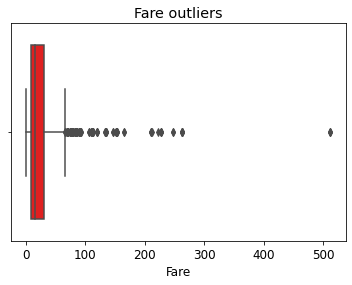

In [48]:
# detecting the outliers

# using red color, set title
sns.boxplot(x='Fare', data=df, color='red').set(title='Fare outliers') 

In [49]:
#Some people wierdly bought the ticket with more than 500
#Finding out more information about these people
df[df['Fare']==df['Fare'].max()]
#Conclusions : These people where all in first class , all embarked from C = Cherbourg and they all survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Not Provided,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


male      577
female    312
Name: Sex, dtype: int64


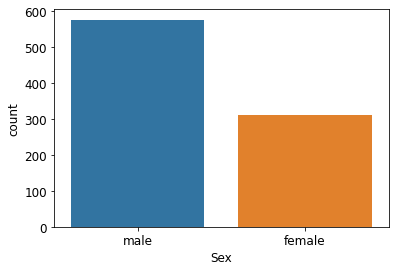

In [50]:
sns.countplot(data = df,x='Sex')

print(df.Sex.value_counts())
#Conclusions : most of the aboard where males

0    549
1    340
Name: Survived, dtype: int64


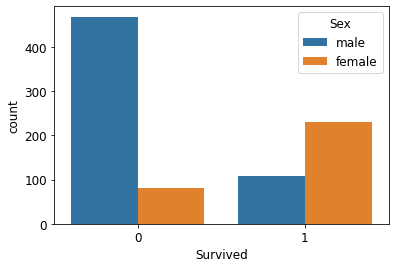

In [51]:
sns.countplot(data = df , x='Survived',hue='Sex')
print(df.Survived.value_counts())
#Conclusion : most of the survivors where females

3    491
1    214
2    184
Name: Pclass, dtype: int64


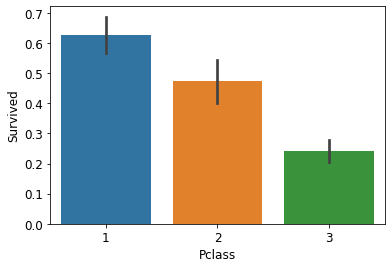

In [52]:
sns.barplot(data = df, y='Survived',x='Pclass')
print(df.Pclass.value_counts())
#Conclusion : most of the people that survived where from the 1st class

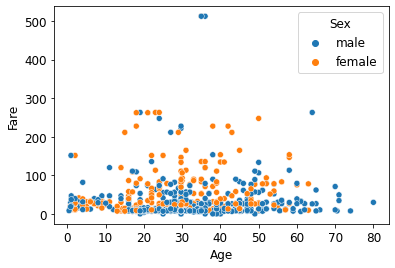

In [53]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex")

S    644
C    168
Q     77
Name: Embarked, dtype: int64


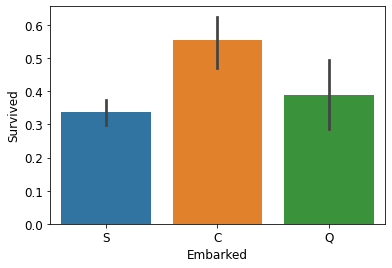

In [54]:
sns.barplot(data = df, y='Survived',x='Embarked')
print(df.Embarked.value_counts())
#Conclusions : most people to survive where embarked from C = Cherbourg, while the least to survive where embarked from S = Southampton

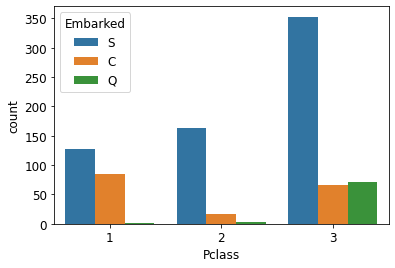

In [55]:
sns.countplot(data = df , x = 'Pclass' , hue = 'Embarked')
# Conclusion : Most of the people embarked from C = Cherbourg where first class
#              And Most of the people embarked from  Q = Queenstown where third class

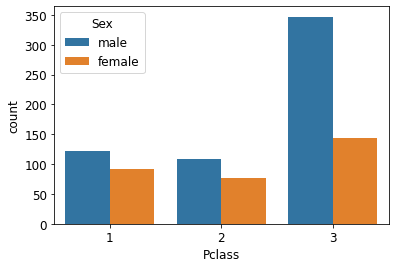

In [56]:
sns.countplot(  x='Pclass',hue='Sex', data=df)
#Conclusions : The 3rd class included the most passengers(and they where mostly males)

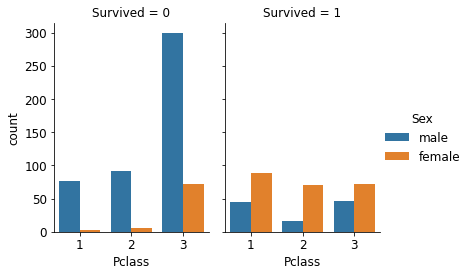

In [57]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7);

[Text(0.5, 1.0, 'Number of parents/children')]

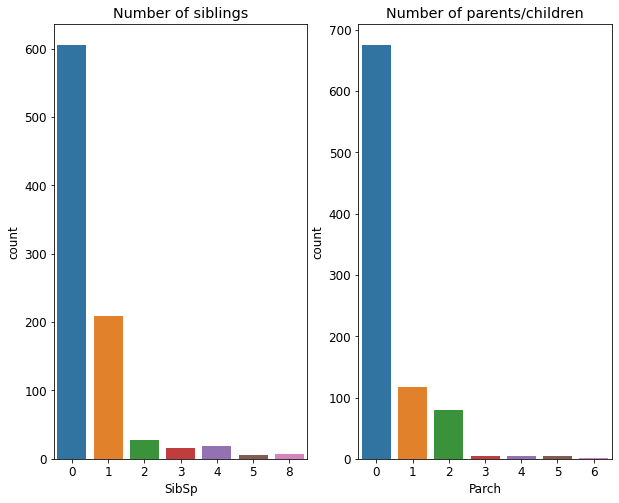

In [58]:
fig,axes=plt.subplots(1,2,figsize=(10,8))

sns.countplot(data = df , x = 'SibSp' , ax = axes[0]).set(title='Number of siblings')
sns.countplot(data = df , x = 'Parch' , ax = axes[1]).set(title='Number of parents/children')

#Conclusion : most of the people aboard where alone without siblings,parents or children

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Sex_label  = le.fit_transform(df['Sex'])

df.drop('Sex', axis=1, inplace=True)

df['Sex'] = Sex_label 

Embarked_label  = le.fit_transform(df['Embarked'])

df.drop('Embarked', axis=1, inplace=True)

df['Embarked'] = Embarked_label

Cabin_label  = le.fit_transform(df['Cabin'])

df.drop('Cabin', axis=1, inplace=True)

df['Cabin'] = Cabin_label


In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex,Embarked,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,2,145
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,80
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,2,145
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,2,54
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,2,145


In [61]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

##Machine Learning

In [62]:
x = df.drop(['Name','Ticket','PassengerId','Survived','Cabin'],axis =1)

y = df['Survived']

In [63]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=52)

In [64]:
#Function for calculating the metric scores
def metrics(test,prediction):
  from sklearn import metrics
  accuracy  = metrics.accuracy_score(test,prediction)
  recall = metrics.recall_score(test,prediction)
  precision = metrics.precision_score(test,prediction)
  f1_score = metrics.f1_score(test,prediction)
  
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )

###***Logistic Regression***

In [65]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [66]:
y_predict = log_reg.predict(x_test)

In [67]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test,y_predict)

print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       111
           1       0.64      0.76      0.69        67

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178



In [68]:
metrics(y_test,y_predict)

Model Accuracy = 74.7 %
Model recall = 76.1 %
Model precision = 63.7 %
Model f1_score = 69.4 %


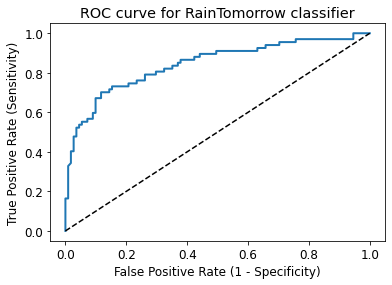

In [69]:
from sklearn.metrics import roc_curve
y_pred_proba = log_reg.predict_proba(x_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

[[82 29]
 [16 51]]


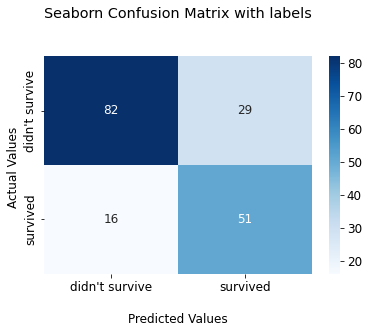

In [70]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,y_predict)


print(cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["didn't survive","survived"])
ax.yaxis.set_ticklabels(["didn't survive","survived"])

## Display the visualization of the Confusion Matrix.
plt.show()

###KNN Algorithm

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
y_predict = knn.predict(x_test)

In [73]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test,y_predict)

print(class_report)

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       111
           1       0.59      0.58      0.59        67

    accuracy                           0.69       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.69      0.69      0.69       178



In [74]:
metrics(y_test,y_predict)

Model Accuracy = 69.1 %
Model recall = 58.2 %
Model precision = 59.1 %
Model f1_score = 58.6 %


Text(0, 0.5, 'Error Rate')

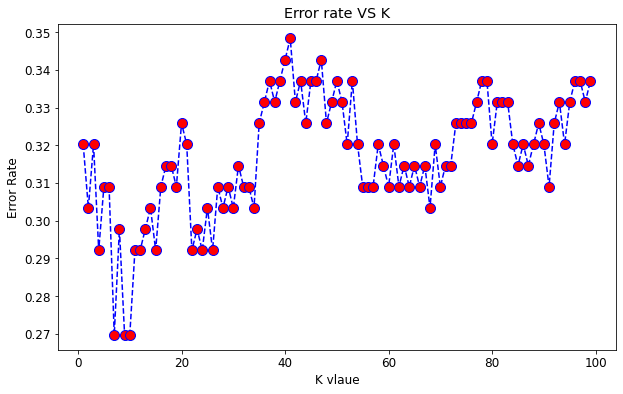

In [75]:
error_rate = []

for i in range(1,100):

  Knn_tuning = KNeighborsClassifier(n_neighbors=i)

  Knn_tuning.fit(x_train,y_train)

  predict_i= Knn_tuning.predict(x_test)

  error_rate.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,100), error_rate, color='blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error rate VS K")

# plt.ylim(0.26,0.28)
# plt.xlim(6,20)
plt.xlabel('K vlaue')
plt.ylabel('Error Rate')

In [76]:
#Conclusion : --> After hypertunning found that the best K (number of neighbours) is 7

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

y_predict = knn.predict(x_test)

In [78]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test,y_predict)

print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       111
           1       0.64      0.64      0.64        67

    accuracy                           0.73       178
   macro avg       0.71      0.71      0.71       178
weighted avg       0.73      0.73      0.73       178



In [79]:
metrics(y_test,y_predict)

Model Accuracy = 73.0 %
Model recall = 64.2 %
Model precision = 64.2 %
Model f1_score = 64.2 %


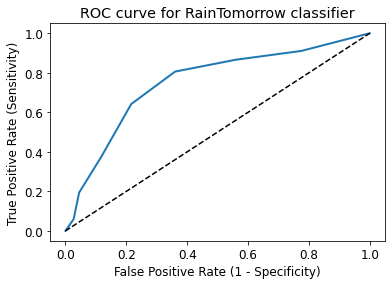

In [80]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

[[87 24]
 [24 43]]


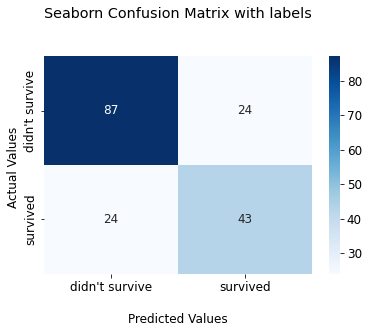

In [81]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,y_predict)


print(cf_matrix)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["didn't survive","survived"])
ax.yaxis.set_ticklabels(["didn't survive","survived"])

## Display the visualization of the Confusion Matrix.
plt.show()

###SVM Algorithm

In [82]:
from sklearn import svm

svm_model = svm.SVC(probability=True)
svm_model.fit(x_train,y_train)

y_predict = svm_model.predict(x_test)

In [83]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test,y_predict)

print(class_report)

              precision    recall  f1-score   support

           0       0.69      0.91      0.78       111
           1       0.68      0.31      0.43        67

    accuracy                           0.69       178
   macro avg       0.68      0.61      0.61       178
weighted avg       0.68      0.69      0.65       178



In [84]:
metrics(y_test , y_predict)

Model Accuracy = 68.5 %
Model recall = 31.3 %
Model precision = 67.7 %
Model f1_score = 42.9 %


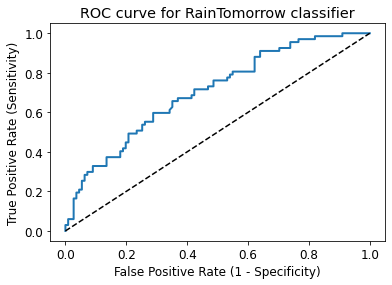

In [85]:
from sklearn.metrics import roc_curve
y_pred_proba = svm_model.predict_proba(x_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # , pos_label = 'Yes'

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

###OUTCOMES:

***I)Logistc Regression:***

Model Accuracy = 74.7 %

Model recall = 76.1 %

Model precision = 63.7 %

Model f1_score = 69.4 %


***II)KNN With K=5:***

Model Accuracy = 69.1 %

Model recall = 58.2 %

Model precision = 59.1 %

Model f1_score = 58.6 %


***II)KNN With K=7 (after hypertunning):***

Model Accuracy = 73.0 %

Model recall = 64.2 %

Model precision = 64.2 %

Model f1_score = 64.2 %

***III)SVM :***

Model Accuracy = 68.5 %

Model recall = 31.3 %

Model precision = 67.7 %

Model f1_score = 42.9 %

###Conclusion :


*   So according to the results of the models , the best model for this data is the logistic regression model.
*   The worst model is the SVM ,because of the very low recall degree which may cause fatal problems in this case.

